In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import tensorflow as tf
print(tf.__version__)

2.15.0


In [33]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [34]:
train_path = '/kaggle/input/food5k-image-dataset/training'
valid_path = '/kaggle/input/food5k-image-dataset/validation'

In [35]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [36]:
folders = glob(train_path + '/*')
folders

['/kaggle/input/food5k-image-dataset/training/food',
 '/kaggle/input/food5k-image-dataset/training/non_food']

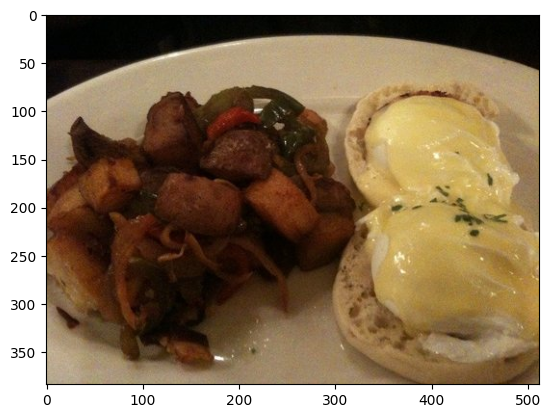

In [37]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [38]:
image_size=[224,224]

In [39]:
ptm = PretrainedModel(
    input_shape=image_size + [3],
    weights='imagenet',
    include_top=False)

In [40]:
x = Flatten()(ptm.output)

In [41]:
model = Model(inputs=ptm.input, outputs=x)

In [42]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [44]:
batch_size = 128

#generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=image_size,
  batch_size=batch_size,
  class_mode='binary',
)

valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=image_size,
  batch_size=batch_size,
  class_mode='binary',
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
Ntrain = len(image_files)
Nvalid = len(valid_image_files)

feat = model.predict(np.random.random([1] + image_size + [3]))
D = feat.shape[1]

X_train = np.zeros((Ntrain, D))
Y_train = np.zeros(Ntrain)
X_valid = np.zeros((Nvalid, D))
Y_valid = np.zeros(Nvalid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


In [46]:
i = 0
for x, y in train_generator:
  # get features
  features = model.predict(x)

  sz = len(y)

  X_train[i:i + sz] = features
  Y_train[i:i + sz] = y

  # increment i
  i += sz
  print(i)

  if i >= Ntrain:
    print('breaking now')
    break
print(i)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
256
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
384
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
512
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
640
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
768
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
896
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1024
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1152
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1280
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1408
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1536
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1664
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1792
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1920
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2048
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2176
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2304
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2432
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2560
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2688
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2816
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2944
2/2 ━━━━━━━━━━━━━━

In [47]:
i = 0
for x, y in valid_generator:

  features = model.predict(x)


  sz = len(y)

  X_valid[i:i + sz] = features
  Y_valid[i:i + sz] = y

  # increment i
  i += sz

  if i >= Nvalid:
    print('breaking now')
    break
print(i)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
breaking now
1000


In [48]:
X_train.max(), X_train.min()

(1486.0162353515625, 0.0)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train)
X_valid2 = scaler.transform(X_valid)

In [50]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train2, Y_train)
print(logr.score(X_train2, Y_train))
print(logr.score(X_valid2, Y_valid))

1.0
0.962


In [51]:
i = Input(shape=(D,))
x = Dense(1, activation='sigmoid')(i)
linearmodel = Model(i, x)

In [52]:
linearmodel.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [53]:
r = linearmodel.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=10,
    validation_data=(X_valid, Y_valid),
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8089 - loss: 7.8471 - val_accuracy: 0.9550 - val_loss: 3.2598
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.6062 - val_accuracy: 0.9530 - val_loss: 4.0229
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9938 - loss: 0.1561 - val_accuracy: 0.9510 - val_loss: 4.3202
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.0168 - val_accuracy: 0.9500 - val_loss: 3.8895
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9997 - loss: 8.4475e-04 - val_accuracy: 0.9500 - val_loss: 4.0919
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 7.0752e-05 - val_accuracy: 0.9500 - val_loss: 4.1222
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 2.9773e-07 - val_accuracy: 0.9500 - val_loss: 4.1173
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 1.9875e-06 - val_accuracy: 0

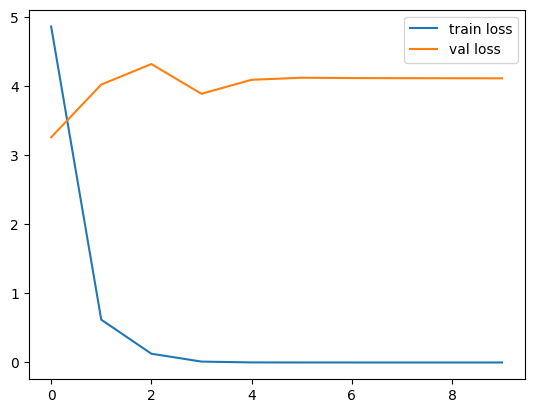

In [54]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

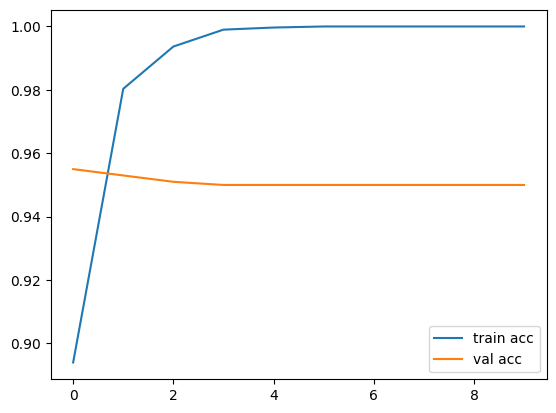

In [55]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()